In [38]:
import pandas as pd
from pandas.plotting import lag_plot
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

In [39]:
df = pd.read_csv(r'C:\Users\jayas\OneDrive\Desktop\New folder\Time_series_Analysis\suzlon_stock_analysis\SUZLON.NS_stock_data.csv')

In [40]:
df.head()

,Unnamed: 0,open,high,low,close,adjclose,volume,ticker
0,2005-10-19,117.347748,128.311218,106.558731,127.236908,125.378822,165674924.0,SUZLON.NS
1,2005-10-20,128.733597,129.973190,116.980461,118.798523,117.063667,42559284.0,SUZLON.NS
2,2005-10-21,116.659081,127.631744,116.659081,123.747696,121.940567,27905407.0,SUZLON.NS
3,2005-10-24,126.162598,126.713524,119.055626,120.093208,118.339439,12115977.0,SUZLON.NS
4,2005-10-25,117.770126,121.874542,117.770126,121.057327,119.289490,6883226.0,SUZLON.NS


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4574 non-null   object 
 1   open        4567 non-null   float64
 2   high        4567 non-null   float64
 3   low         4567 non-null   float64
 4   close       4567 non-null   float64
 5   adjclose    4567 non-null   float64
 6   volume      4567 non-null   float64
 7   ticker      4574 non-null   object 
dtypes: float64(6), object(2)
memory usage: 286.0+ KB


In [42]:
df.describe()

,open,high,low,close,adjclose,volume
count,4567.000000,4567.000000,4567.000000,4567.000000,4567.000000,4.567000e+03
mean,55.909554,57.226028,54.298680,55.663623,55.381071,3.635490e+07
std,83.138638,85.056650,80.729644,82.780295,82.172524,5.572448e+07
min,1.560963,1.652785,1.560963,1.606874,1.606874,0.000000e+00
25%,8.447568,8.677122,8.263925,8.401657,8.401657,8.901684e+06
50%,17.216511,17.537886,16.849226,17.124689,17.124689,2.082782e+07
75%,50.409946,51.833178,48.940804,50.088573,50.088573,4.124960e+07
max,416.869141,422.194794,406.263763,417.429260,415.220642,8.115259e+08


In [43]:
df.shape

(4574, 8)

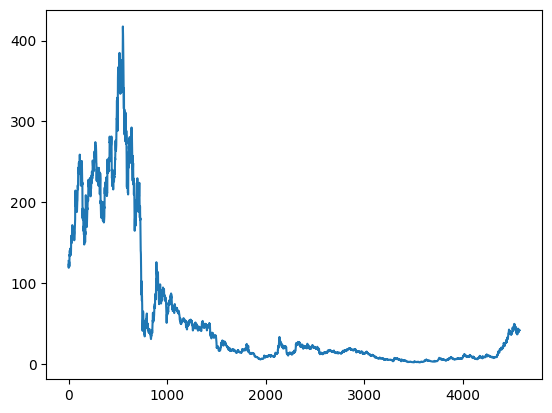

In [44]:
df['close'].plot()
plt.show()

In [45]:
df['Date'] = pd.to_datetime(df['Unnamed: 0'])

In [46]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4574 entries, 0 to 4573
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   open      4567 non-null   float64       
 1   high      4567 non-null   float64       
 2   low       4567 non-null   float64       
 3   close     4567 non-null   float64       
 4   adjclose  4567 non-null   float64       
 5   volume    4567 non-null   float64       
 6   ticker    4574 non-null   object        
 7   Date      4574 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 286.0+ KB


In [48]:
df.columns[:-3]

Index(['open', 'high', 'low', 'close', 'adjclose'], dtype='object')

In [49]:
df['year'] = df['Date'].dt.year

In [50]:
df['Date'].head(1)

0   2005-10-19
Name: Date, dtype: datetime64[ns]

In [51]:
df.tail(1)

,open,high,low,close,adjclose,volume,ticker,Date,year
4573,41.849998,42.0,41.400002,41.599998,41.599998,17807846.0,SUZLON.NS,2024-04-29,2024


In [52]:
import seaborn as sns
from datetime import datetime

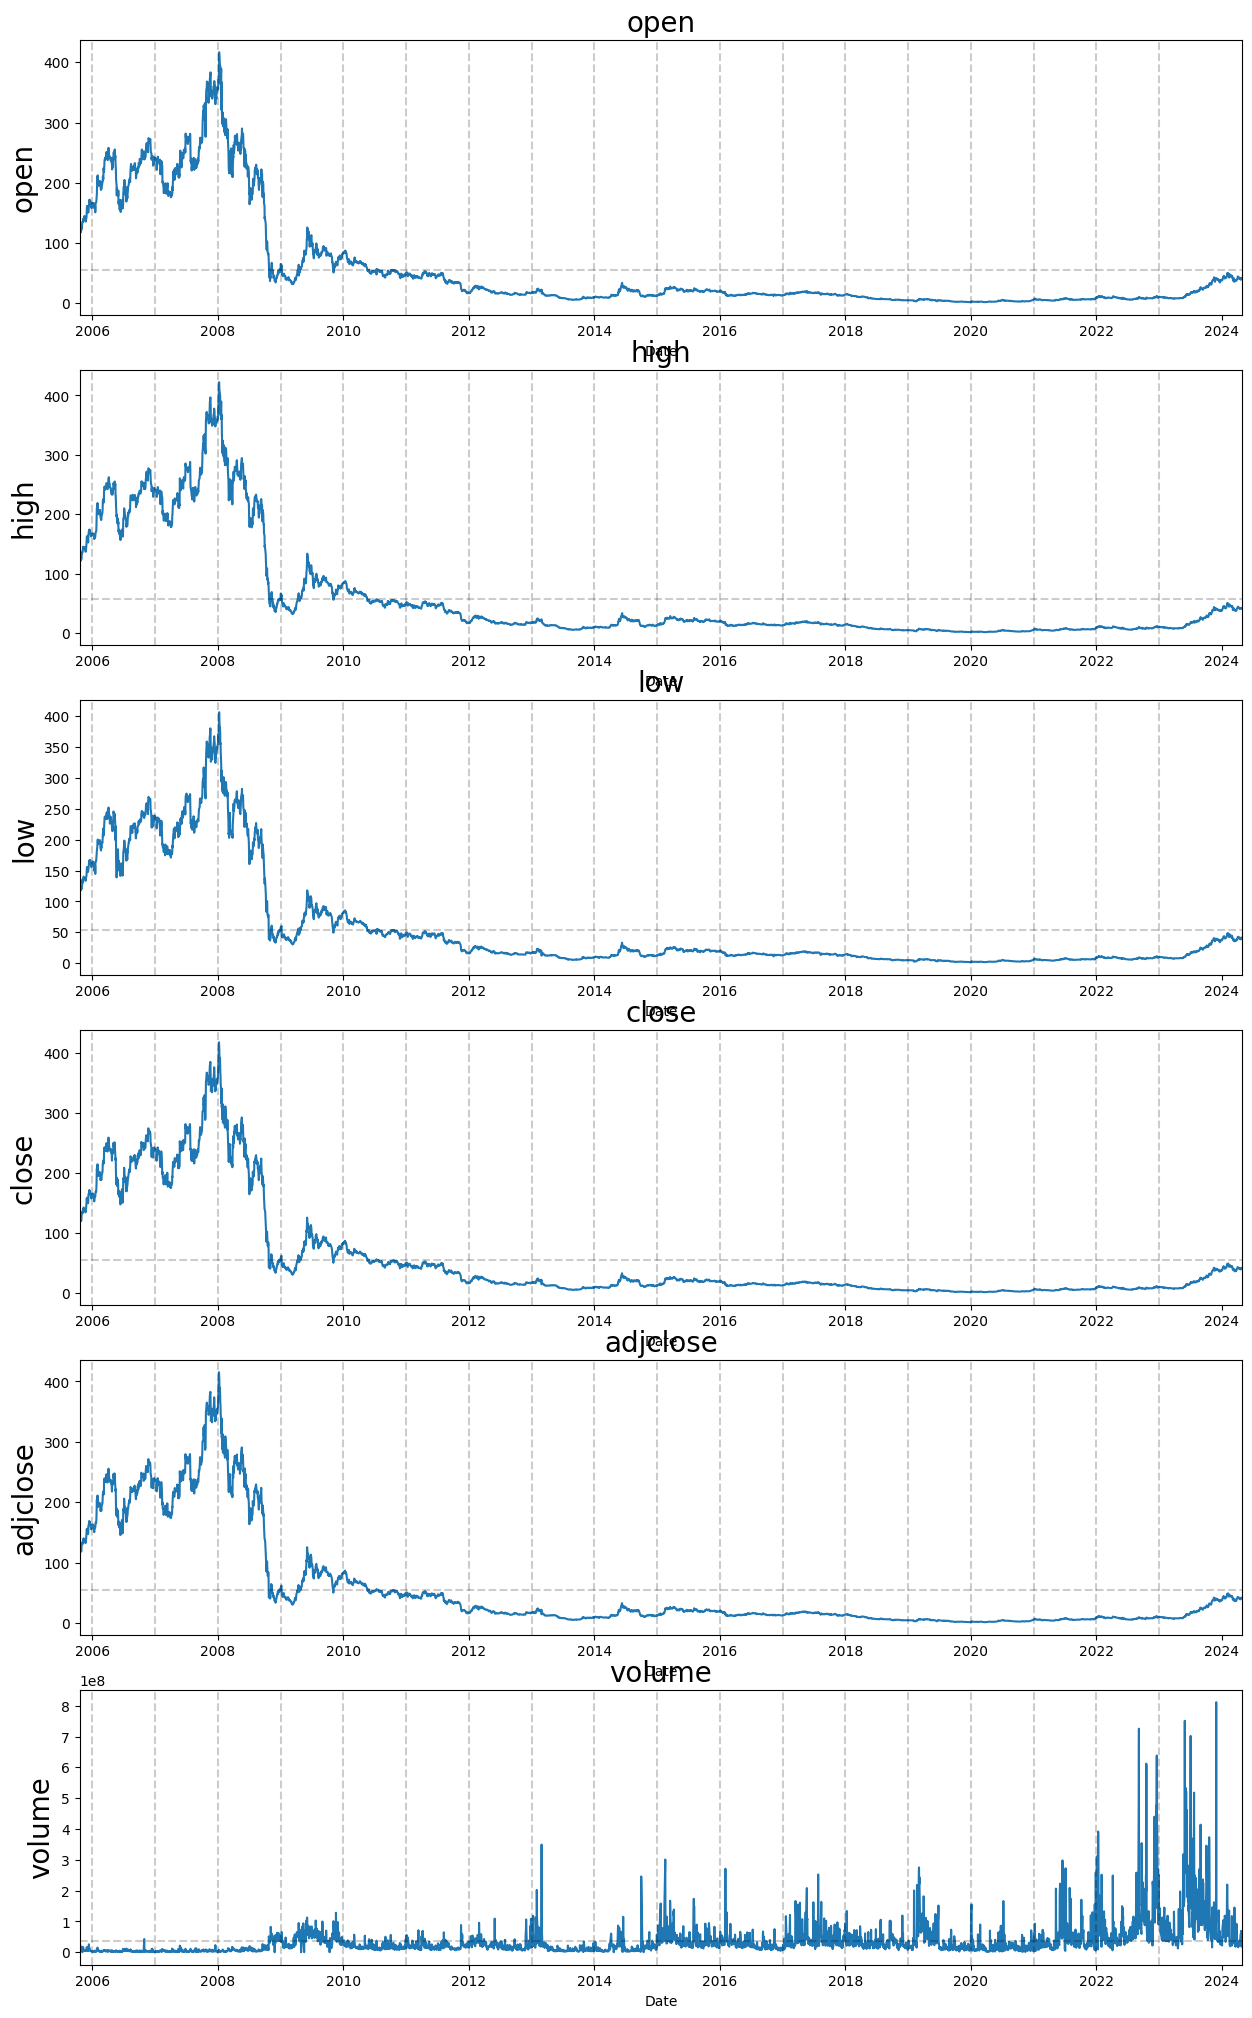

In [53]:
row,axe = plt.subplots(6,1,figsize = (15,25))
for i,col in enumerate(df.columns[:-3]):
    sns.lineplot(x = df['Date'],y = df[col],ax=axe[i])
    axe[i].set_title(col,fontsize = 20)
    axe[i].set_xlabel('Date')
    axe[i].set_ylabel(col,fontsize = 20)
    axe[i].set_xlim([datetime(2005,10,19),datetime(2024,4,29)])
    axe[i].axhline(df[col].mean(),color = 'k',alpha = 0.2,linestyle = '--')
    for year in range(2005,2024):
        axe[i].axvline(pd.to_datetime(str(year) + '-01-01'),color = 'k',linestyle='--',alpha = 0.2)


<Axes: ylabel='open'>

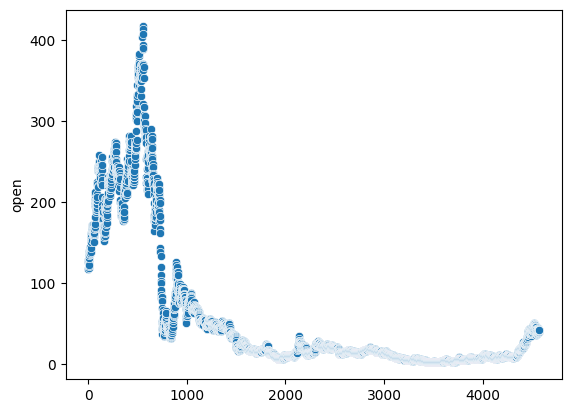

In [54]:
sns.scatterplot(df['open'])

In [55]:
df.isna().sum()

open        7
high        7
low         7
close       7
adjclose    7
volume      7
ticker      0
Date        0
year        0
dtype: int64

In [56]:
df.dropna(inplace=True)

In [57]:
df.isna().sum()

open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
Date        0
year        0
dtype: int64

In [58]:
df.head()

,open,high,low,close,adjclose,volume,ticker,Date,year
0,117.347748,128.311218,106.558731,127.236908,125.378822,165674924.0,SUZLON.NS,2005-10-19,2005
1,128.733597,129.973190,116.980461,118.798523,117.063667,42559284.0,SUZLON.NS,2005-10-20,2005
2,116.659081,127.631744,116.659081,123.747696,121.940567,27905407.0,SUZLON.NS,2005-10-21,2005
3,126.162598,126.713524,119.055626,120.093208,118.339439,12115977.0,SUZLON.NS,2005-10-24,2005
4,117.770126,121.874542,117.770126,121.057327,119.289490,6883226.0,SUZLON.NS,2005-10-25,2005


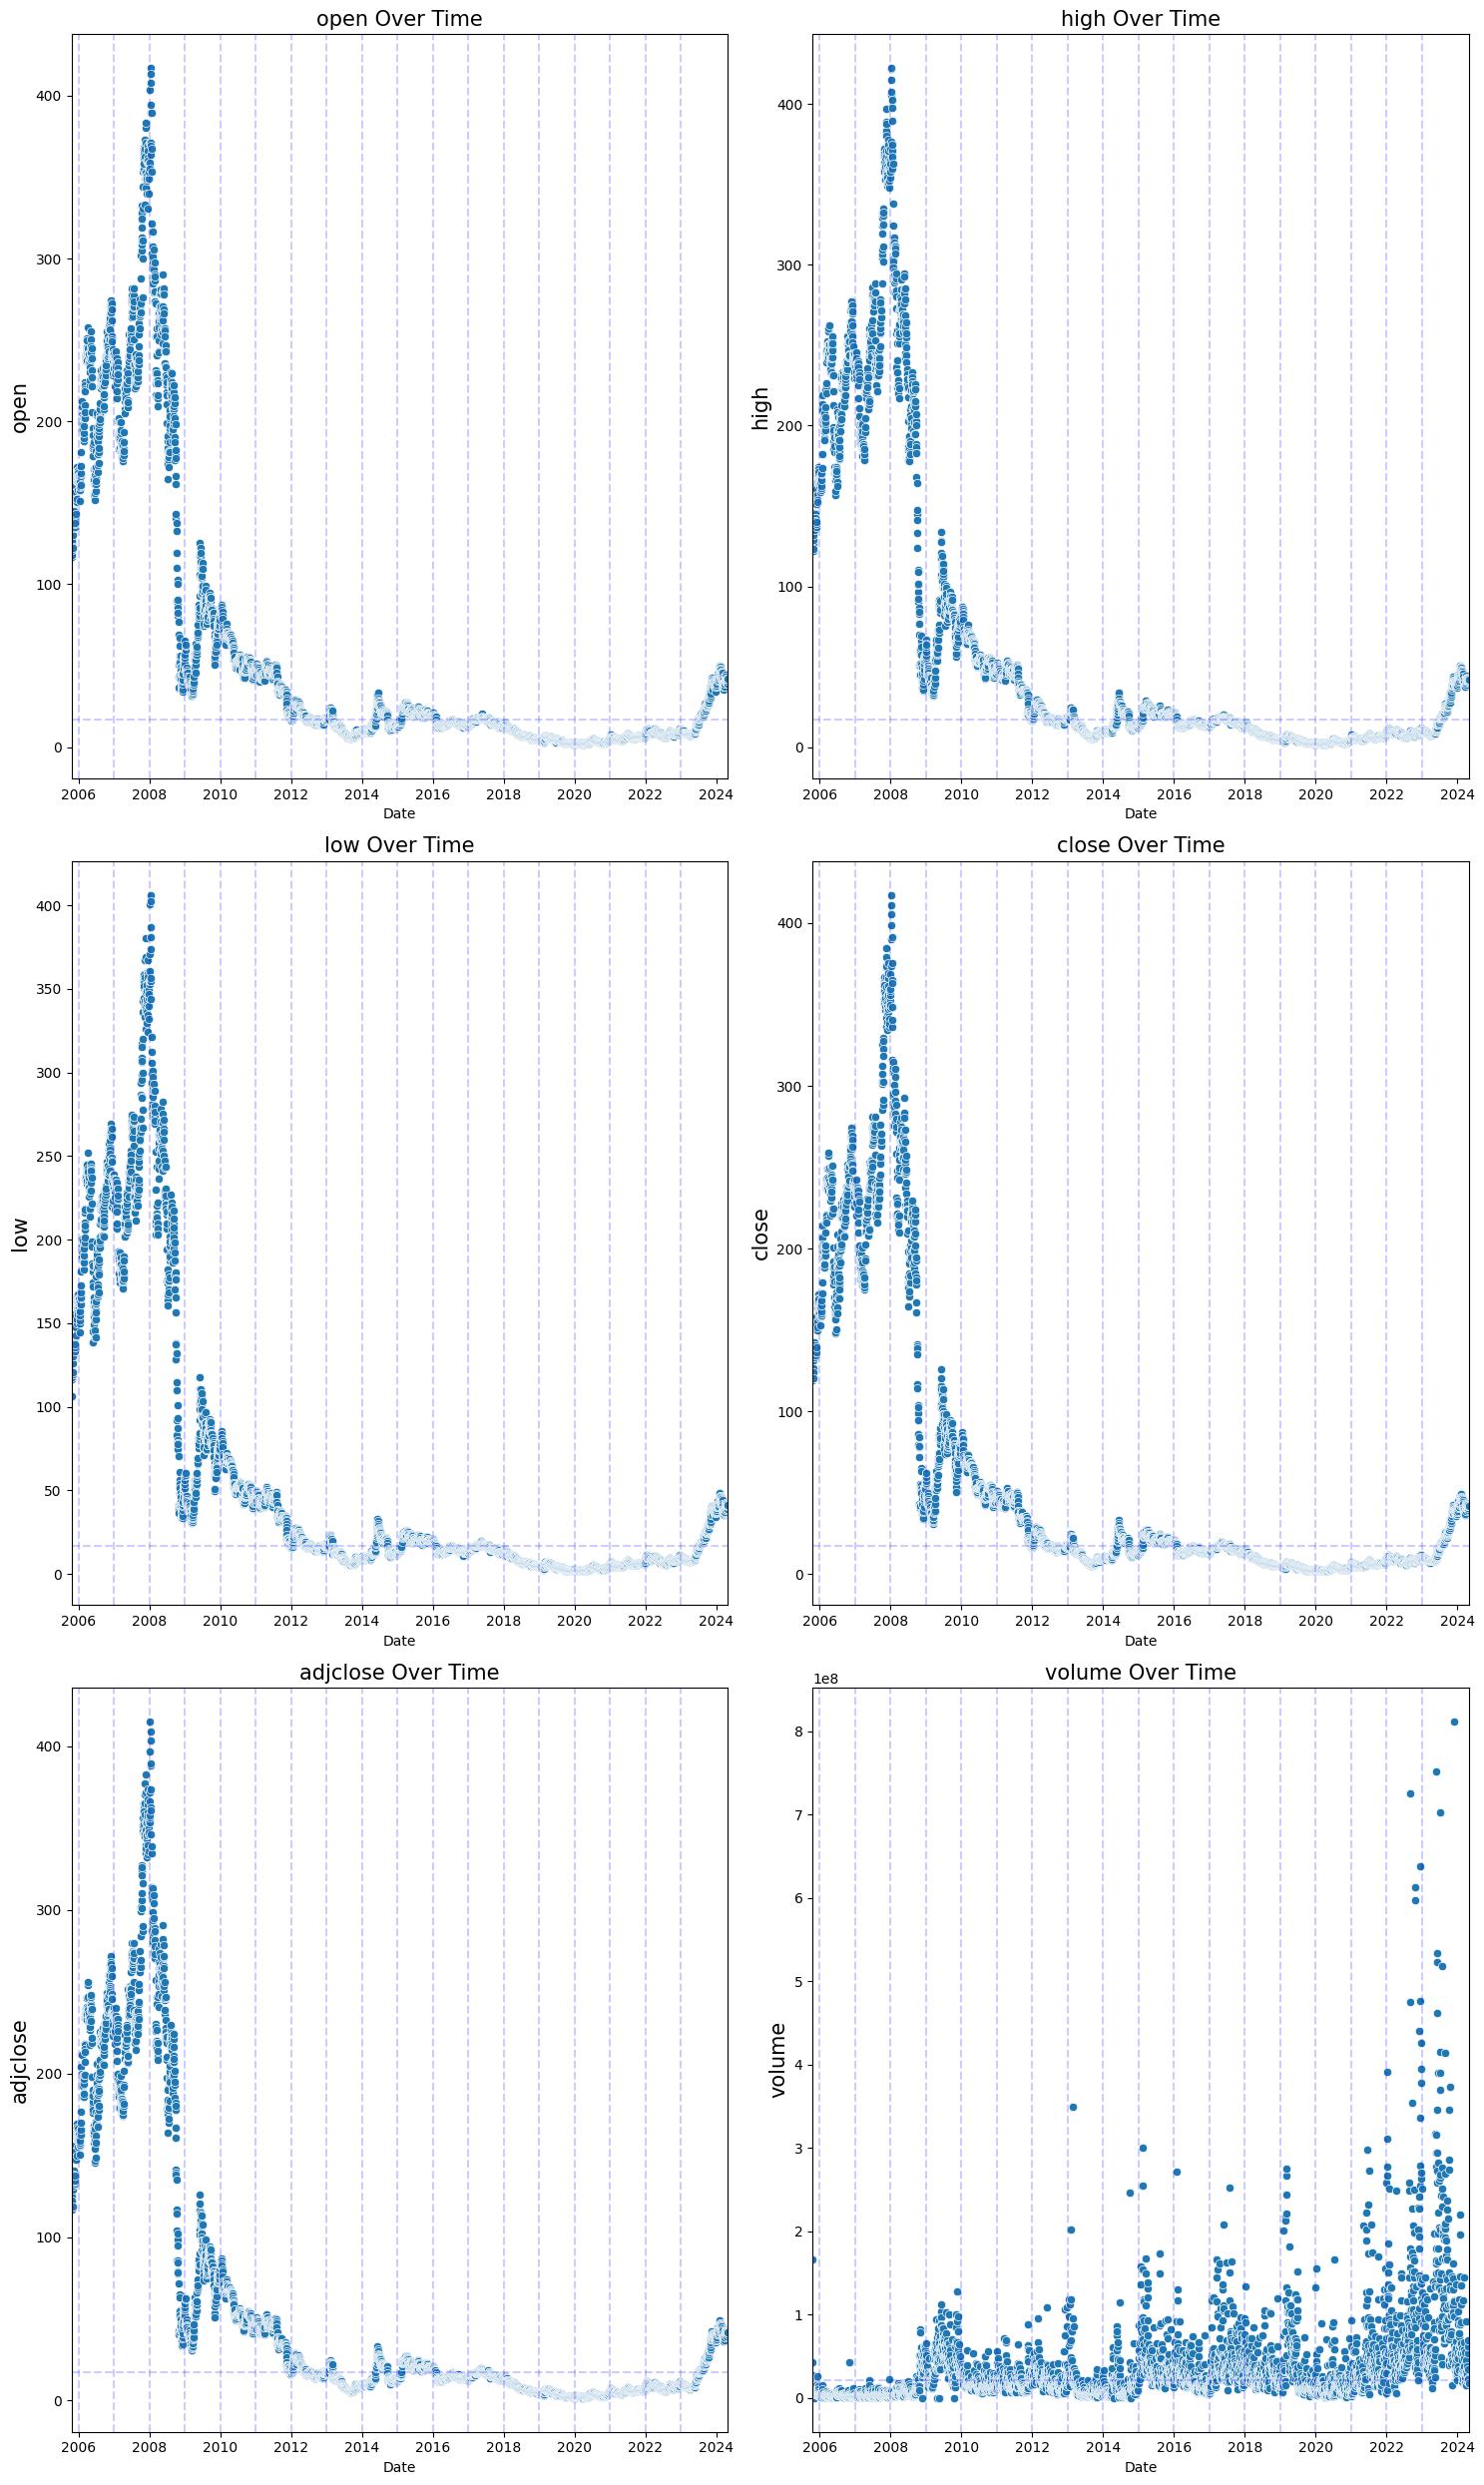

In [59]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create subplots
fig, axe = plt.subplots(3, 2, figsize=(15, 25))  # 6 rows, 2 columns
axe = axe.flatten()  # Flatten the 2D array to 1D

# Loop through the selected columns
for i, col in enumerate(df.columns[:-3]):  # Adjust range if necessary
    sns.scatterplot(x=df['Date'], y=df[col], ax=axe[i])  # Pass a single Axes object
    axe[i].set_xlabel('Date')
    axe[i].set_ylabel(col, fontsize=15)
    axe[i].set_title(f"{col} Over Time", fontsize=15)
    axe[i].set_xlim([datetime(2005, 10, 19), datetime(2024, 4, 29)])
    axe[i].axhline(df[col].median(), color='b', alpha=0.2, linestyle="--")  # Median line
    for year in range(2005, 2024):  # Vertical lines for each year
        axe[i].axvline(pd.to_datetime(f"{year}-01-01"), color="b", alpha=0.2, linestyle="--")

# Adjust layout
plt.tight_layout()
plt.show()


In [80]:
train_data,test_data = df[0:int(len(df)*0.8)],df[int(len(df)*0.8):]

In [82]:
train_ar = train_data['open'].values
test_ar = test_data['open'].values

history = [x for x in train_ar] #list compression
print(type(history))

<class 'list'>


In [83]:
prediction = list()
for i in range(len(test_ar)):
    model = ARIMA(history,order=(5,1,0))
    model_fit = model.fit()
    out = model_fit.forecast()
    y = out[0]
    prediction.append(y)
    obs = test_ar[i]
    history.append(obs)


In [84]:
def smape_kun(y_pred,y_test):
    return np.mean((np.abs(y_pred - y_test) * 200 / (np.abs(y_pred) + np.abs(y_test))))

In [85]:
mse = mean_squared_error(test_ar,prediction)
smape = smape_kun(test_ar,prediction)

In [86]:
print(f'MSE : {mse} smape: {smape}')

MSE : 0.5288437911381677 smape: 3.2541061325525042


In [60]:
df

,open,high,low,close,adjclose,volume,ticker,Date,year
0,117.347748,128.311218,106.558731,127.236908,125.378822,165674924.0,SUZLON.NS,2005-10-19,2005
1,128.733597,129.973190,116.980461,118.798523,117.063667,42559284.0,SUZLON.NS,2005-10-20,2005
2,116.659081,127.631744,116.659081,123.747696,121.940567,27905407.0,SUZLON.NS,2005-10-21,2005
3,126.162598,126.713524,119.055626,120.093208,118.339439,12115977.0,SUZLON.NS,2005-10-24,2005
4,117.770126,121.874542,117.770126,121.057327,119.289490,6883226.0,SUZLON.NS,2005-10-25,2005
...,...,...,...,...,...,...,...,...,...
4569,41.000000,42.099998,40.549999,41.849998,41.849998,69215858.0,SUZLON.NS,2024-04-23,2024
4570,41.900002,42.500000,41.450001,41.799999,41.799999,34252835.0,SUZLON.NS,2024-04-24,2024
4571,42.200001,42.299999,41.250000,42.150002,42.150002,22866483.0,SUZLON.NS,2024-04-25,2024
4572,42.049999,42.150002,41.250000,41.650002,41.650002,18201395.0,SUZLON.NS,2024-04-26,2024


In [63]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_closed = scaler.fit_transform(df['close'].values.reshape(-1,1))

In [64]:
def create_seq(data,seq_length):
    x,y = [],[]
    for i in range(len(data)-seq_length):
        x.append(data[i:i +seq_length])
        y.append(data[i + seq_length])
    return np.array(x),np.array(y)


In [69]:
seq_length = 60
x,y = create_seq(scaler_closed,seq_length)

In [70]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.20)

In [71]:
model = Sequential([
    LSTM(50,return_sequences=True,input_shape = (seq_length,1)),
    LSTM(50,return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer = 'adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,batch_size = 42,epochs = 8,validation_data = (x_test,y_test))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

mse = mean_squared_error(y_test,predictions)
mae = mean_absolute_error(y_test,predictions)

Epoch 1/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.0129 - val_loss: 5.7338e-04
Epoch 2/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 4.6204e-04 - val_loss: 4.8813e-04
Epoch 3/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3.2206e-04 - val_loss: 5.9647e-04
Epoch 4/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 4.1966e-04 - val_loss: 4.1889e-04
Epoch 5/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 5.3687e-04 - val_loss: 3.6133e-04
Epoch 6/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 2.8354e-04 - val_loss: 3.7434e-04
Epoch 7/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 2.3171e-04 - val_loss: 3.4716e-04
Epoch 8/8
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 2.4992e-04 - val_loss: 2.9196e-04
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


In [72]:
df['month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [73]:
df.head()

,open,high,low,close,adjclose,volume,ticker,Date,year,month,Day
0,117.347748,128.311218,106.558731,127.236908,125.378822,165674924.0,SUZLON.NS,2005-10-19,2005,10,19
1,128.733597,129.973190,116.980461,118.798523,117.063667,42559284.0,SUZLON.NS,2005-10-20,2005,10,20
2,116.659081,127.631744,116.659081,123.747696,121.940567,27905407.0,SUZLON.NS,2005-10-21,2005,10,21
3,126.162598,126.713524,119.055626,120.093208,118.339439,12115977.0,SUZLON.NS,2005-10-24,2005,10,24
4,117.770126,121.874542,117.770126,121.057327,119.289490,6883226.0,SUZLON.NS,2005-10-25,2005,10,25


In [74]:
features = ['open','high','low','adjclose','volume','year','Day','month']
x_r = df[features]
y_r = df['close']


In [75]:
x_r_train,x_r_test,y_r_treain,y_r_test = train_test_split(x_r,y_r,random_state=0,test_size=0.20)


In [76]:
reg = LinearRegression()
reg.fit(x_r_train,y_r_treain)

LinearRegression()

In [77]:
y_pred = reg.predict(x_r_test)

In [78]:
reg_mse = mean_squared_error(y_r_test,y_pred)
reg_mae = mean_absolute_error(y_r_test,y_pred)

In [79]:
print("Comparison of Models:")
print(f"LSTM Model - MSE: {mse}, MAE: {mae}")
print(f"Linear Regression - MSE: {reg_mse}, MAE: {reg_mae}")

Comparison of Models:
LSTM Model - MSE: 50.482420947339136, MAE: 3.0719770744211656
Linear Regression - MSE: 0.14529030562773115, MAE: 0.21420817589884708
